# Question 4

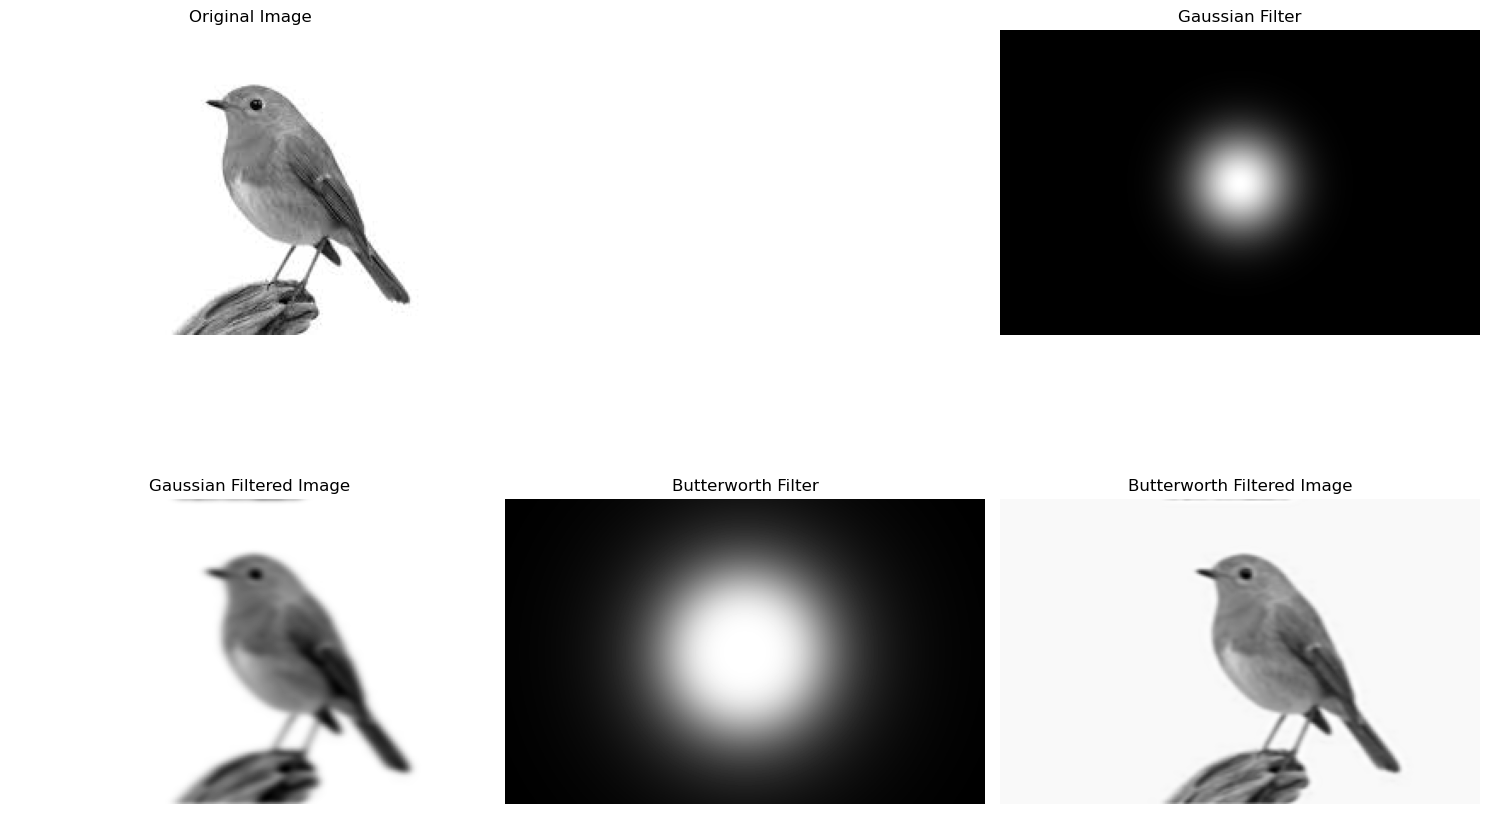

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_transform(image):
    # Converting image to float
    image_float = np.float32(image) / 255.0
    
    # Apply Fourier Transform
    f_transform = np.fft.fft2(image_float)
    f_transform_shifted = np.fft.fftshift(f_transform)  
    
    # Compute magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  
    return f_transform_shifted, magnitude_spectrum

def gaussian_filter(shape, sigma):
    rows, cols = shape
    x = np.linspace(-cols//2, cols//2, cols)
    y = np.linspace(-rows//2, rows//2, rows)
    X, Y = np.meshgrid(x, y)
    
    gaussian = np.exp(-(X**2 + Y**2) / (2*sigma**2))
    return gaussian / np.sum(gaussian)

def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    x = np.linspace(-cols//2, cols//2, cols)
    y = np.linspace(-rows//2, rows//2, rows)
    X, Y = np.meshgrid(x, y)
    
    D = np.sqrt(X**2 + Y**2)
    butterworth = 1 / (1 + (D / cutoff)**(2 * order))
    return butterworth

# Loading the image
image_path = 'IMAGE_HW2.jpeg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Applying the Fourier Transform
f_transform, magnitude_spectrum = fourier_transform(image)

# Step 2: Creating gaussian filters
gaussian = gaussian_filter(image.shape, sigma=20)
butterworth = butterworth_filter(image.shape, cutoff=50, order=2)

# Step 3: Applying filters to the frequency domain
gaussian_filtered = f_transform * gaussian
butterworth_filtered = f_transform * butterworth

# Step 4: Inverse Fourier Transform to get filtered images back to spatial domain
gaussian_result = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered)).real
butterworth_result = np.fft.ifft2(np.fft.ifftshift(butterworth_filtered)).real

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')



plt.subplot(2, 3, 3)
plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(butterworth, cmap='gray')
plt.title('Butterworth Filter')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(butterworth_result, cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
